<a href="https://colab.research.google.com/github/Nord-ouest-Advisors/InvestGuard/blob/main/InvestGuard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
trnx_url = 'https://raw.githubusercontent.com/Nord-ouest-Advisors/InvestGuard/main/data/SampleTransactions.csv?token=ATIZFFUXOULHEXVCG5VTDK3AYTMX4'
prices_url = 'https://raw.githubusercontent.com/Nord-ouest-Advisors/InvestGuard/main/data/Prices.csv?token=ATIZFFRCZCTBXBLXDKUQXTTAYTM2E'
info_url = 'https://raw.githubusercontent.com/Nord-ouest-Advisors/InvestGuard/main/data/FundsInfo.csv'

In [11]:
trnx = pd.read_csv(trnx_url).sort_values(by='InstructionDate')
prices = pd.read_csv(prices_url).sort_values(by='Date')
info = pd.read_csv(info_url)

In [16]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68276 entries, 13901 to 0
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      68276 non-null  object 
 1   FundISIN  68276 non-null  object 
 2   FundNAV   68276 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.1+ MB


In [12]:
portfolio_dict = {
    user:{
        portfolio:{
            'transactions':trnx[trnx['FundPortfolio']==portfolio], 
            'prices':prices[prices['FundISIN']==isin], 
            'info':info[info['FundISIN']==isin]
            } 
          for portfolio in trnx['FundPortfolio'].unique() 
          for isin in trnx['FundISIN'].unique()
          } 
          for user in trnx['CustomerID'].unique()
          }


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


KeyError: ignored

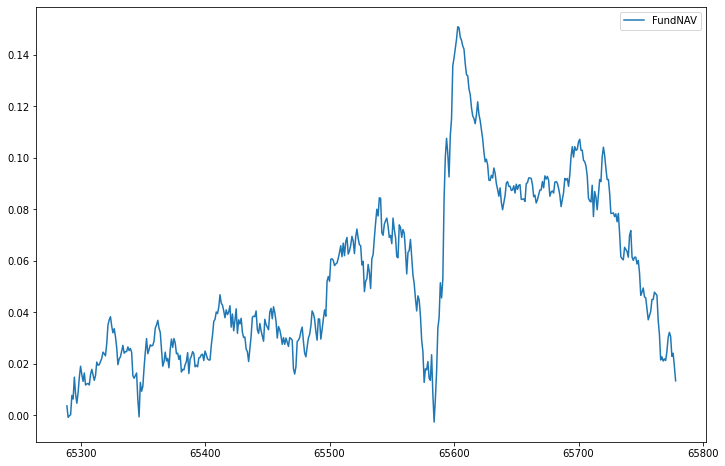

In [13]:
df = portfolio_dict['Admin']['PopularPortfolio_03']['prices']
df.sort_index(inplace=True)
ax = ((1+df['FundNAV'].pct_change()).cumprod()-1).plot(figsize=(12,8), legend=True)
cumulative_returns(df['FundNAV']).plot(ax=ax, legend=True, secondary_y=True)

Functions to compute financial quantities

In [8]:
def daily_returns(data):
    """Returns DataFrame with daily returns (percentage change)
    :math:`\\displaystyle R = \\dfrac{\\text{price}_{t_i} - \\text{price}_{t_{i-1}}}{\\text{price}_{t_{i-1}}}`
    :Input:
     :data: ``pandas.DataFrame`` with daily stock prices
    :Output:
     :ret: a ``pandas.DataFrame`` of daily percentage change of Returns
         of given stock prices.
    """
    return data.pct_change().dropna(how="all").replace([np.inf, -np.inf], np.nan)

def cumulative_returns(data, dividend=0):
    """Returns DataFrame with cumulative returns
    :math:`\\displaystyle R = \\dfrac{\\text{price}_{t_i} - \\text{price}_{t_0} + \\text{dividend}}{\\text{price}_{t_0}}`
    :Input:
     :data: ``pandas.DataFrame`` with daily stock prices
     :dividend: ``float`` (default= ``0``), paid dividend
    :Output:
     :ret: a ``pandas.DataFrame`` of cumulative Returns of given stock prices.
    """
    if isinstance(data, pd.Series):
        data = pd.DataFrame(data)
    return data.dropna(axis=0, how="any").apply(lambda x: (x - x[0] + dividend) / x[0])

def cumulative_returns_v2(data):
    pass